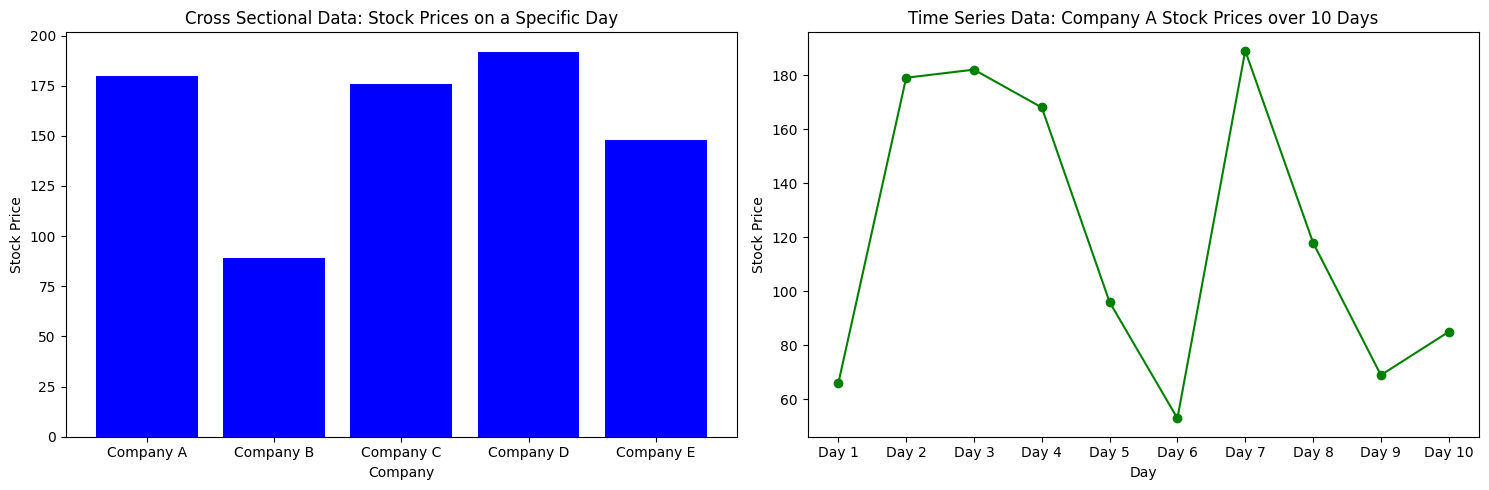

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 임의의 데이터 생성
# 1. Cross Sectional Data
companies = ['Company A', 'Company B', 'Company C', 'Company D', 'Company E']
stock_prices_on_a_day = np.random.randint(50, 200, size=5)

# 2. Time Series Data
days = ['Day ' + str(i) for i in range(1, 11)]
company_a_prices_over_10_days = np.random.randint(50, 200, size=10)

# 그림 생성
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# 교차 단면 데이터 그래프
ax[0].bar(companies, stock_prices_on_a_day, color='blue')
ax[0].set_title('Cross Sectional Data: Stock Prices on a Specific Day')
ax[0].set_ylabel('Stock Price')
ax[0].set_xlabel('Company')

# 시계열 데이터 그래프
ax[1].plot(days, company_a_prices_over_10_days, marker='o', color='green')
ax[1].set_title('Time Series Data: Company A Stock Prices over 10 Days')
ax[1].set_ylabel('Stock Price')
ax[1].set_xlabel('Day')

# 그래프 표시
plt.tight_layout()
plt.show()


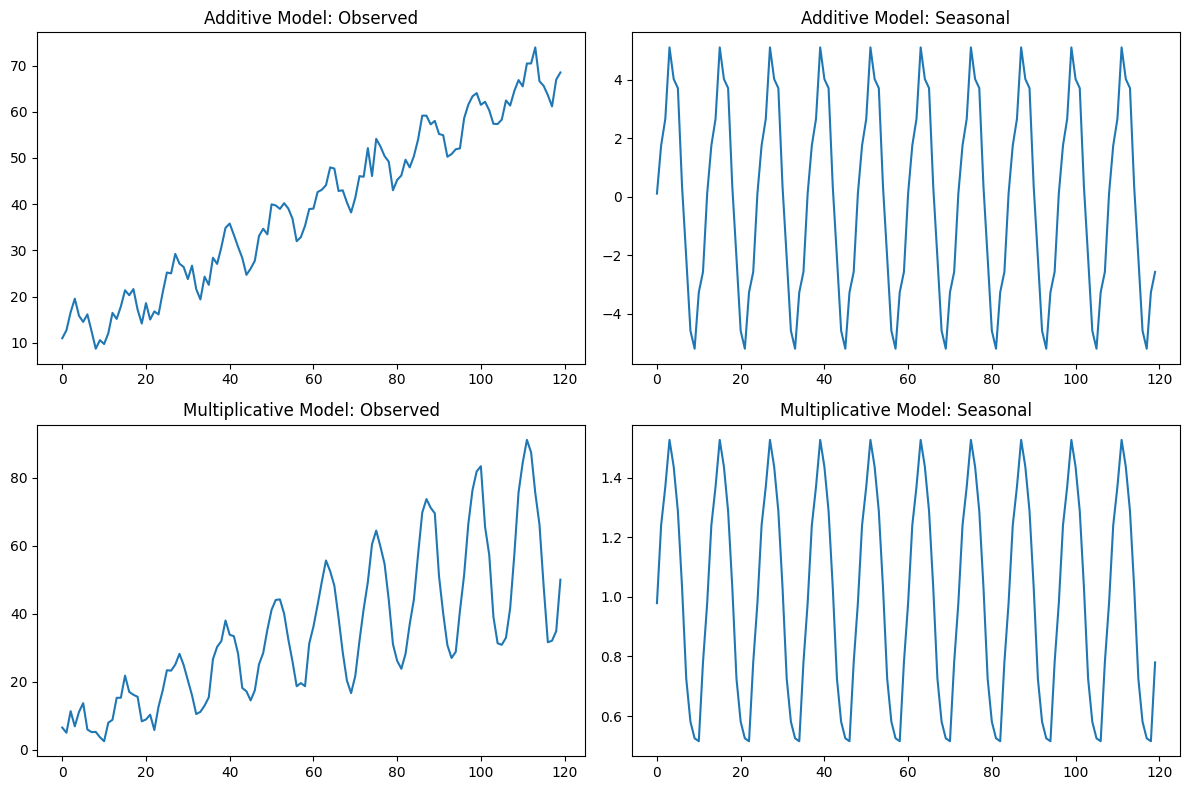

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 생성
np.random.seed(42)
time = np.arange(120)

# 덧셈 분해에 적합한 데이터
trend_add = time * 0.5
seasonal_add = 10 + 5 * np.sin(time * 2 * np.pi / 12)
noise_add = np.random.normal(0, 2, 120)
data_additive = trend_add + seasonal_add + noise_add

# 곱셈 분해에 적합한 데이터
trend_mul = time * 0.5 + 5
seasonal_mul = 1 + 0.5 * np.sin(time * 2 * np.pi / 12)
noise_mul = np.random.normal(0, 2, 120)
data_multiplicative = trend_mul * seasonal_mul + noise_mul

# 분해
result_additive = seasonal_decompose(data_additive, model='additive', period=12)
result_multiplicative = seasonal_decompose(data_multiplicative, model='multiplicative', period=12)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 덧셈 분해
axes[0, 0].plot(result_additive.observed)
axes[0, 0].set_title("Additive Model: Observed")
axes[0, 1].plot(result_additive.seasonal)
axes[0, 1].set_title("Additive Model: Seasonal")

# 곱셈 분해
axes[1, 0].plot(result_multiplicative.observed)
axes[1, 0].set_title("Multiplicative Model: Observed")
axes[1, 1].plot(result_multiplicative.seasonal)
axes[1, 1].set_title("Multiplicative Model: Seasonal")

plt.tight_layout()
plt.show()


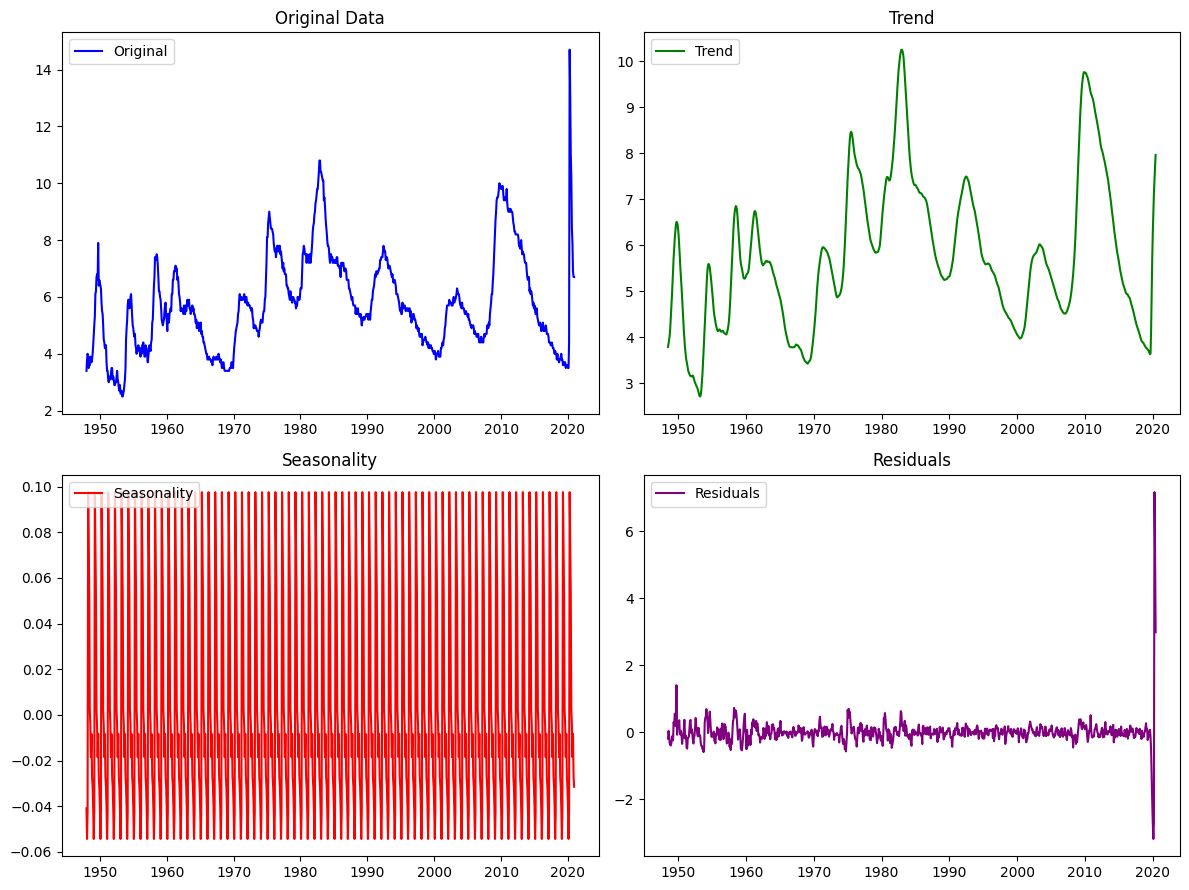

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas_datareader.data as web

# FRED에서 US 실업률 데이터 가져오기
start = pd.to_datetime('1948-01-01')
end = pd.to_datetime('2020-12-31')
unemployment = web.DataReader('UNRATE', 'fred', start, end)

# 월별 데이터이기 때문에 주기는 12로 설정
result = seasonal_decompose(unemployment['UNRATE'], model='additive', period=12)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Original Data
axes[0, 0].plot(unemployment['UNRATE'], label='Original', color='blue')
axes[0, 0].legend(loc='upper left')
axes[0, 0].set_title('Original Data')

# Trend
axes[0, 1].plot(result.trend, label='Trend', color='green')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_title('Trend')

# Seasonality
axes[1, 0].plot(result.seasonal, label='Seasonality', color='red')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_title('Seasonality')

# Residuals
axes[1, 1].plot(result.resid, label='Residuals', color='purple')
axes[1, 1].legend(loc='upper left')
axes[1, 1].set_title('Residuals')

plt.tight_layout()
plt.show()
